<a href="https://colab.research.google.com/github/DawoodNAldhahli/Data-Analytics/blob/main/Covid_Cases%2C_GDP_and_Population.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv( 'https://www.fdsp.net/data/covid-merged.csv' )
df['gdp']=df['gdp']/1000
df = df.rename(columns = {'gdp':'gdp (billion $)'})
df.head()

,state,cases,population,gdp (billion $),urban
0,Alabama,7068,4903185,230.7501,59.04
1,Alaska,353,731545,54.6747,66.02
2,Arizona,7648,7278717,379.0188,89.81
3,Arkansas,3281,3017804,132.5964,56.16
4,California,50470,39512223,3205.0001,94.95


In [ ]:
df.describe()

,cases,population,gdp,urban
count,50.000000,5.000000e+01,5.000000e+01,50.000000
mean,21374.060000,6.550675e+06,4.296362e+05,73.581800
std,46789.151556,7.389282e+06,5.598341e+05,14.564557
min,353.000000,5.787590e+05,3.432020e+04,38.660000
25%,3313.500000,1.827712e+06,9.947943e+04,65.075000
50%,7020.500000,4.558234e+06,2.551785e+05,73.735000
75%,20893.500000,7.530849e+06,5.607694e+05,86.937500
max,309696.000000,3.951222e+07,3.205000e+06,94.950000


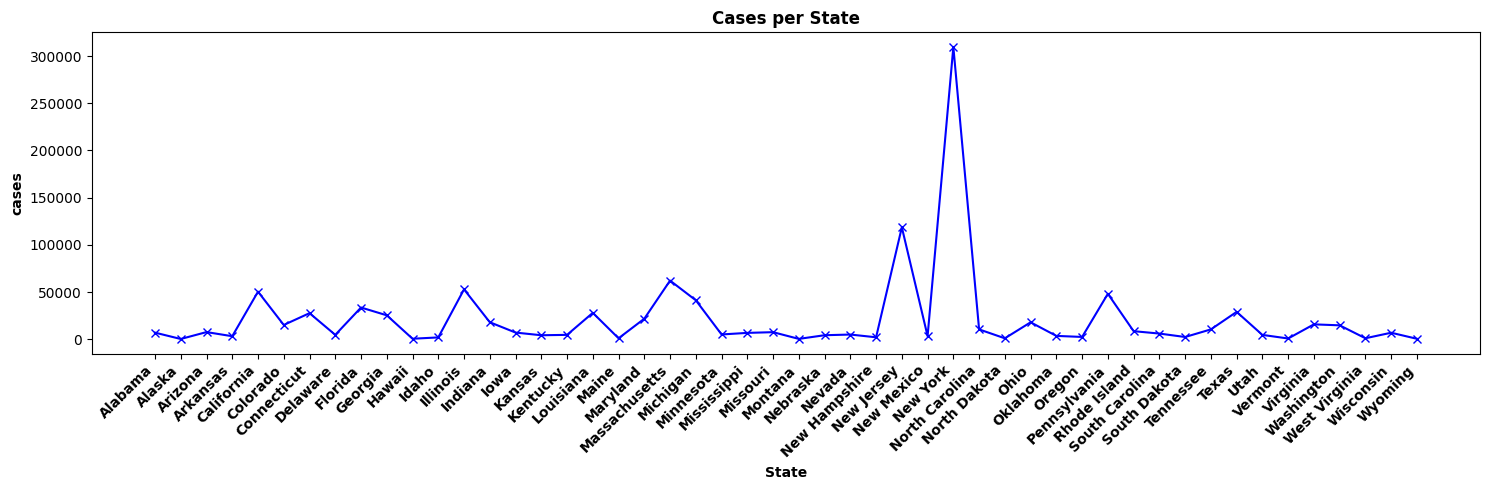

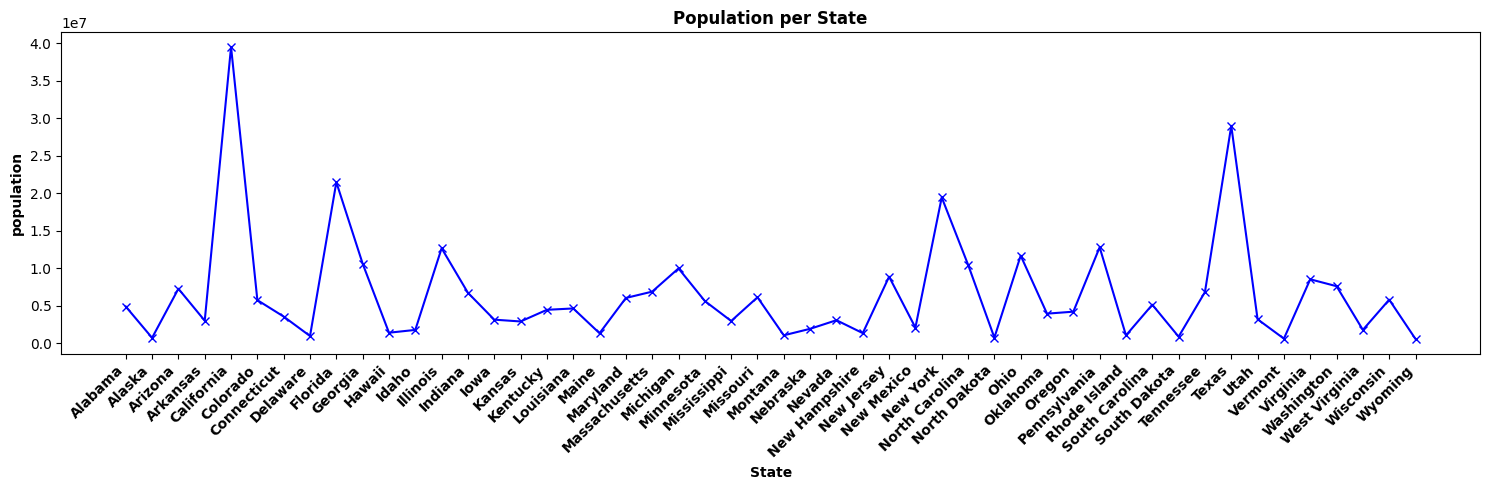

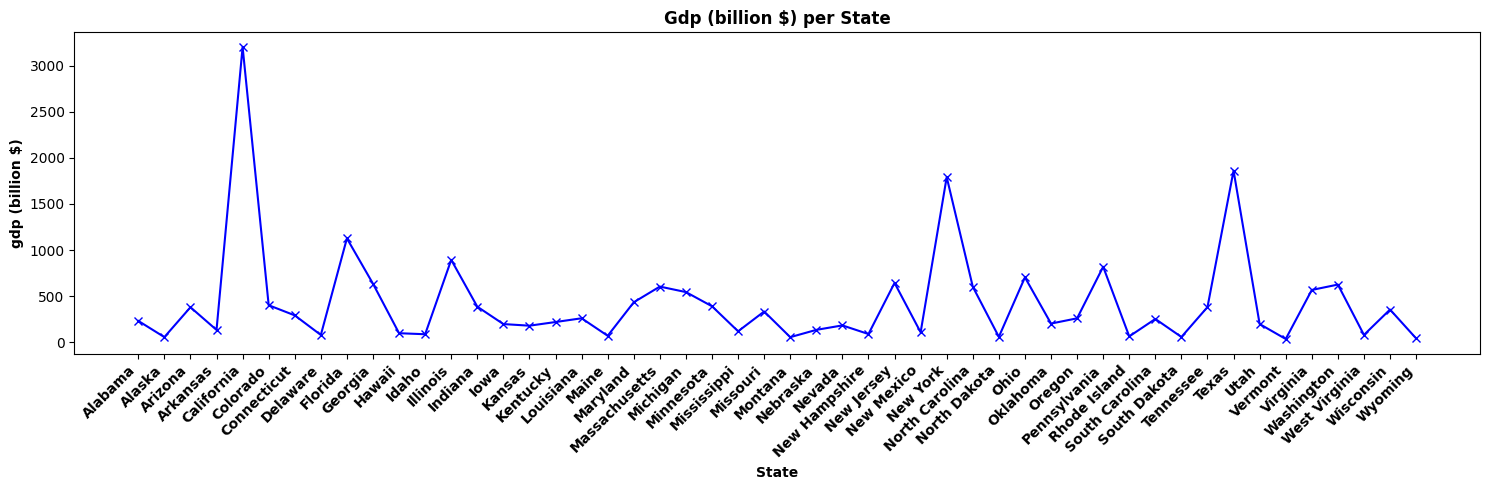

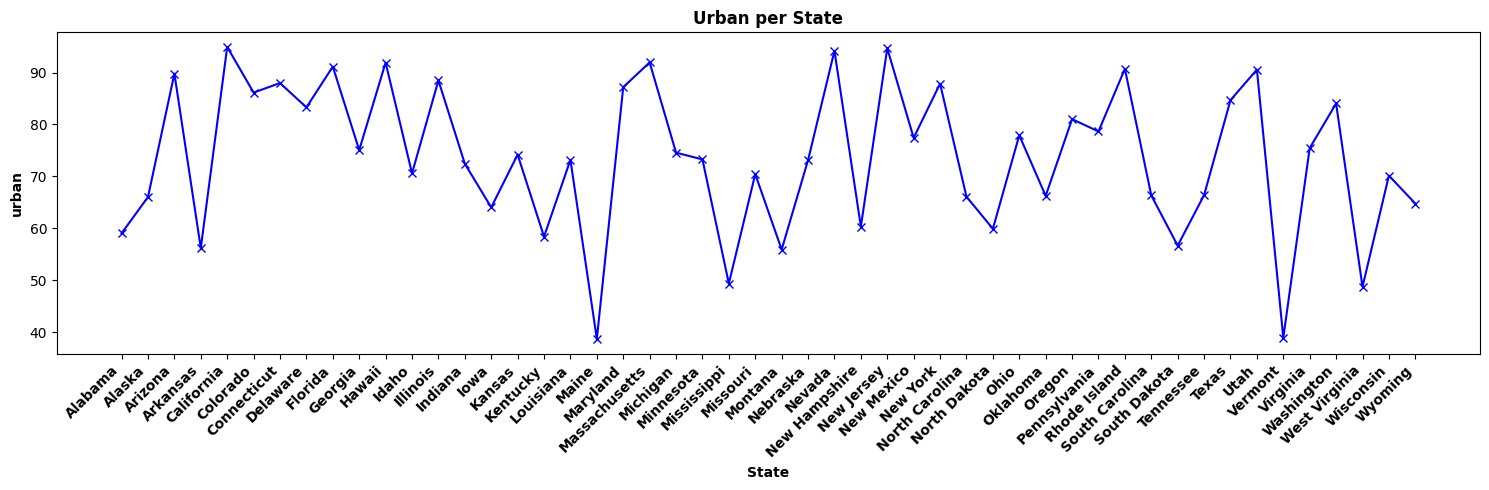

In [ ]:
for i in df.columns[1:5]:
  plt.figure(figsize = (15,5))
  plt.plot(range(1,51), df[i], color = 'blue', marker = 'x')
  plt.xlabel('State', fontweight='bold')
  plt.ylabel(i, fontweight='bold')
  plt.title(f"{i.capitalize()} per State", fontweight = 'bold')
  plt.xticks(ticks = range(1,51), labels = df['state'], rotation = 45, ha = 'right', fontweight = 'bold')
  #plt.yticks(fontweight = 'bold')
  plt.tight_layout()

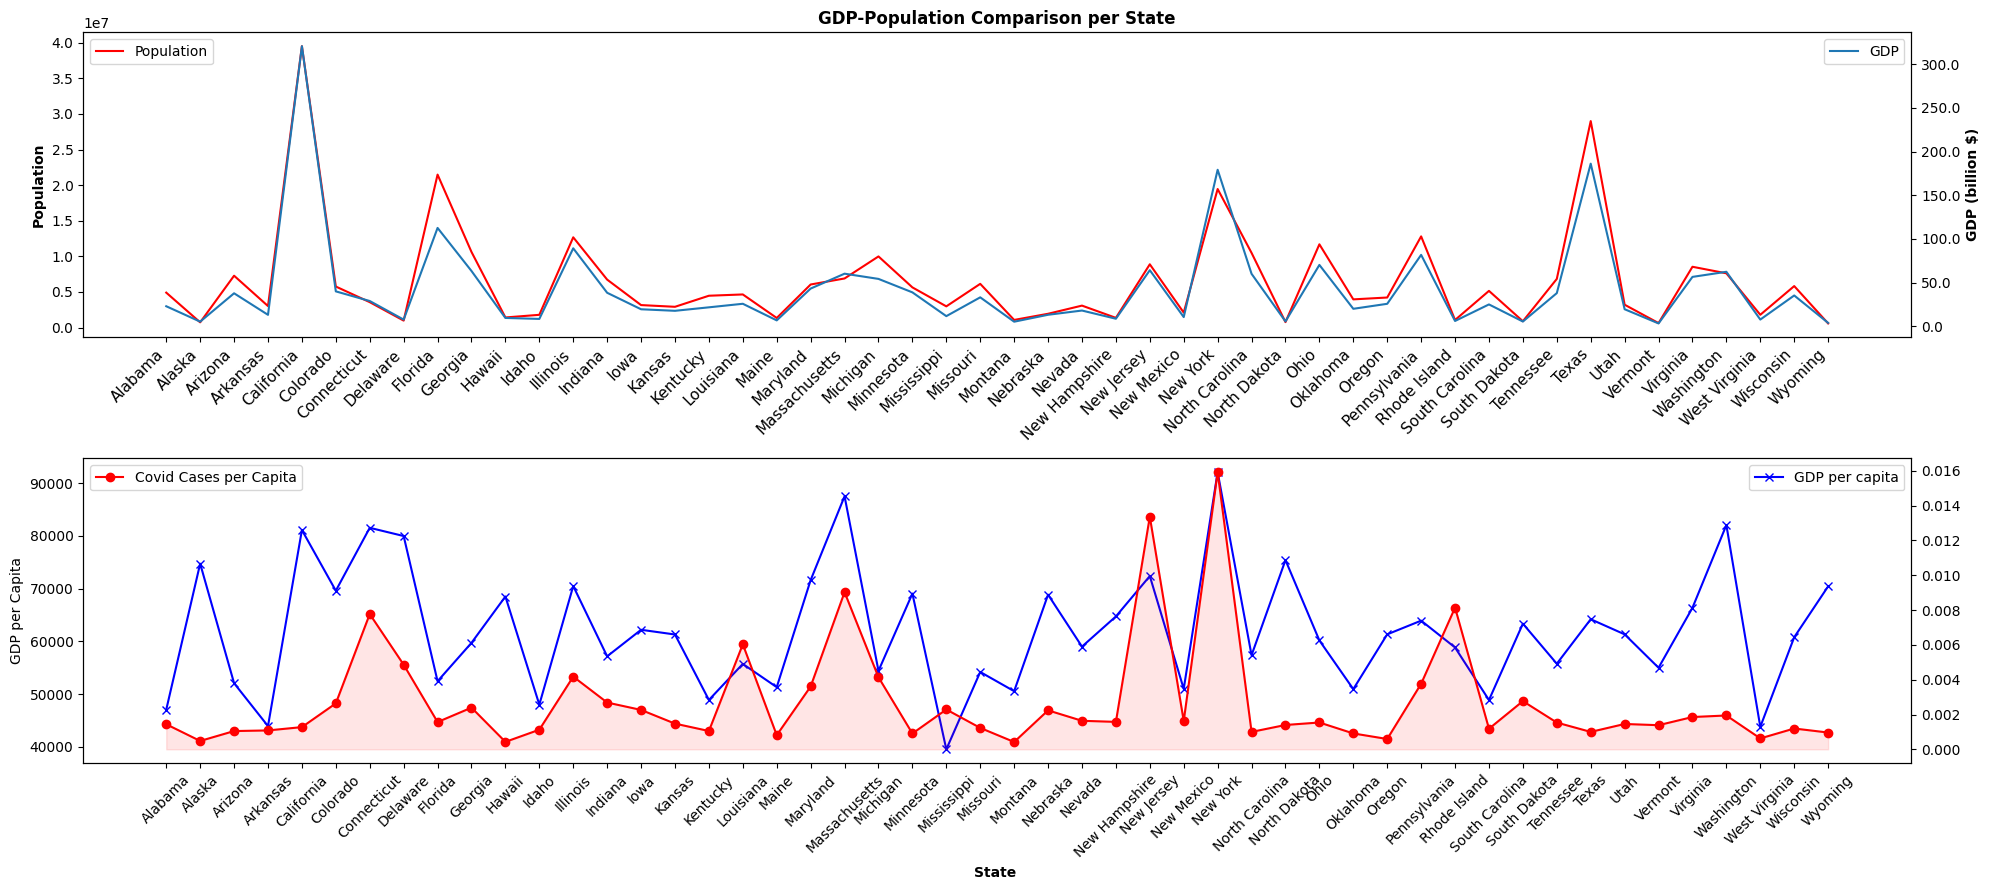

In [ ]:
fig, ax = plt.subplots(2,1, figsize = (20,9))
ax[0].plot(range(1,51), df['population'], c = 'r' , label = 'Population')
ax[0].set_ylabel('Population', fontweight = 'bold')
ax[0].set_xticks(ticks = range(1,51), labels = df['state'], rotation = 45, ha = 'right', size = 11)

ax1 = ax[0].twinx()
ax1.plot(range(1,51), df['gdp (billion $)']*10**9, label = 'GDP')
ax1.set_ylabel('GDP (billion $)', fontweight = 'bold')
ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(float(x)/10**10)))

ax[0].set_title('GDP-Population Comparison per State', fontweight = 'bold')
ax[0].legend(loc = 'upper left')
ax1.legend(loc = 'upper right')




ax[1].plot(range(1,51), (df['gdp (billion $)']/df['population'])*10**9, label = 'GDP per capita', c ='b', marker = 'x')
ax[1].set_xticks(ticks = range(1,51), labels = df['state'], rotation =45)
ax[1].legend()
ax[1].set_ylabel('GDP per Capita')
ax2 = ax[1].twinx()
ax2.plot(range(1,51), df['cases']/df['population'], color = 'red', marker = 'o', label = 'Covid Cases per Capita')
ax2.fill_between(range(1,51), df['cases']/df['population'], color = 'red', alpha = 0.1)
ax2.legend(loc = 'upper left')

ax[1].set_xlabel('State ', fontweight='bold')
plt.tight_layout()


In [ ]:
Data = pd.DataFrame({'State': df['state'],
                   'Cases per Capita(100,000)': ((df['cases']/df['population'])*100000).astype(int),
                   'GDP per Capita': df['gdp (billion $)']*10**9/df['population']})
Data

,State,"Cases per Capita(100,000)",GDP per Capita
0,Alabama,144,47061.267319
1,Alaska,48,74738.669528
2,Arizona,105,52072.198988
3,Arkansas,108,43938.042365
4,California,127,81114.142831
5,Colorado,264,69609.615721
6,Connecticut,776,81537.054380
7,Delaware,486,79977.694801
8,Florida,156,52450.139416
9,Georgia,239,59726.121866


In [ ]:
import plotly.express as px

fig = px.treemap(Data, path=['State'], values='Cases per Capita(100,000)', hover_data=['GDP per Capita'],
                   title='Covid Cases and GDP per Capita by State',
                   color='Cases per Capita(100,000)')
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()

fig = px.treemap(Data, path=['State'], values='GDP per Capita', hover_data=['Cases per Capita(100,000)'],
                   title='GDP per Capita and Covid Cases by State',
                   color='GDP per Capita',
                   color_continuous_scale = 'haline' ) #
fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
fig.show()


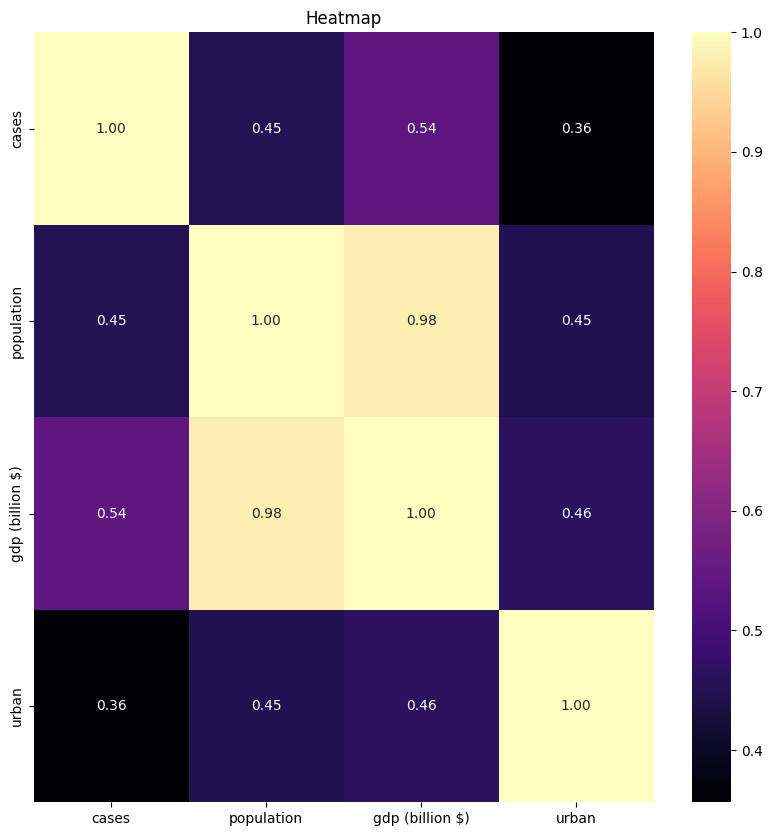

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.iloc[:, 1:5].corr(), annot=True, cmap="magma", fmt=".2f")
plt.title('Heatmap')
plt.show()